<a href="https://colab.research.google.com/github/pythonkvs/seminars/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_14_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://compscicenter.ru/courses/python/2015-autumn/classes/1560/  
https://habr.com/ru/company/yandex/blog/517266/  
https://webdevblog.ru/vvedenie-v-testirovanie-v-python/

# Тестирование



## Тестировать или не тестировать?

* Тестировать:
    * тесты проверяют корректность кода
    * и позволяют бесстрашно изменять код даже в больших
проектах.
* Не тестировать:
    * написание тестов требует времени,
    * нередко в проекте тестов больше, чем кода,
    * работающие тесты не гарантируют корректность.
* Тем не менее, ответ очевиден: конечно же тестировать!

## Пример

In [19]:
import itertools
def rle(iterable):
    """Applies run-length encoding to an iterable."""
    for item, g in itertools.groupby(iterable):
        yield item, sum(1 for _ in g)
        # yield item, list(g)

list(rle("mississippi"))

[('m', 1),
 ('i', 1),
 ('s', 2),
 ('i', 1),
 ('s', 2),
 ('i', 1),
 ('p', 2),
 ('i', 1)]

## Тестирование с помощью `print`

* Функция `print` позволяет организовать
полуавтоматическое тестирование вне интерактивной
оболочки.
* Интерпретатор печатает — вы проверяете:

In [ ]:
def test_rle():
    print(list(rle("mississippi")))

test_rle()

[('m', 1), ('i', 1), ('s', 2), ('i', 1), ('s', 2), ('i', 1), ('p', 2), ('i', 1)]


# Модуль `doctest`

## Доктесты и модуль `doctest`

In [ ]:
import doctest
import itertools

def rle(iterable):
    """Applies run-length encoding to an iterable.
    >>> list(rle(""))
    []
    >>> list(rle("mississippi"))
    [('m', 1), ('i', 1), ('s', 2), ('i', 1),
    ('s', 2), ('i', 1), ('p', 2), ('i', 1)]
    """
    for item, g in itertools.groupby(iterable):
        yield item, sum(1 for _ in g)

if __name__ == "__main__":
    doctest.testmod()

**********************************************************************
File "__main__", line 8, in __main__.rle
Failed example:
    list(rle("mississippi"))
Expected:
    [('m', 1), ('i', 1), ('s', 2), ('i', 1),
    ('s', 2), ('i', 1), ('p', 2), ('i', 1)]
Got:
    [('m', 1), ('i', 1), ('s', 2), ('i', 1), ('s', 2), ('i', 1), ('p', 2), ('i', 1)]
**********************************************************************
1 items had failures:
   1 of   2 in __main__.rle
***Test Failed*** 1 failures.


## Модуль `doctest` и функция `rle`

```bash
$ python ./test_doctest.py # можно python -m doctest
*****************************************************
File "test_doctest.py", line 10, in __main__.rle
Failed example:
    list(rle("mississippi"))
Expected:
    [('m', 1), ('i', 1), ('s', 2), ('i', 1),
('s', 2), ('i', 1), ('p', 2), ('i', 1)]
Got:
    [('m', 1), ('i', 1), ('s', 2), ('i', 1), ...]
******************************************************
1 items had failures:
    1 of 2 in __main__.rle
***Test Failed*** 1 failures.


```

## Модуль `doctest` и директивы

* Директивы позволяют изменить то, как `doctest` сравнивает
ожидаемый вывод интерпретатора с фактическим.
* Например, директива `NORMALIZE_WHITESPACE` нормализует
пробельные символы перед сравнением:


In [ ]:
>>> list(rle("mississippi")) # doctest: +NORMALIZE_WHITESPACE
[('m', 1), ('i', 1), ('s', 2), ('i', 1),
('s', 2), ('i', 1), ('p', 2), ('i', 1)]

* А директива `ELLIPSIS` позволяет использовать символ `...`,
который совпадает с любой строкой:

In [ ]:
>>> list(rle("mississippi")) # doctest: +ELLIPSIS
[('m', 1), ('i', 1), ('s', 2), ('i', 1), ...]

**doctest: полезные директивы**

* `SKIP` – не запускает тесты на помеченном примере
* `IGNORE_EXCEPTION_DETAIL` – игнорирует текст эксепшна

## Модуль `doctest`: резюме

* Модуль `doctest` позволяет проверить реализацию функции
на соответствие записанному сеансу интерпретатора.
* Плюсы:
    * доступен в стандартной библиотеке,
    * решает задачу тестирования для небольших проектов,
    * доктесты их легко читать,
    * примеры кода в документации всегда актуальны.
* Минусы:
    * доктесты требуют, чтобы у результата было содержательное
строковое представление,
    * длинные доктесты ухудшают читаемость документации,
    * нет способа запустить подмножество доктестов,
    * если в середине доктеста произошла ошибка, оставшаяся
часть не выполнится.

# `assert`

## Тестирование с помощью `assert`

* Напоминание:
    * оператор `assert` принимает два аргумента: условие и
произвольное значение,
    * если условие `falsy`, оператор поднимает исключение
`AssertionError`.


In [ ]:
assert [], 42

AssertionError: ignored

* Протестируем функцию `rle`:

In [ ]:
def test_rle():
    s = "mississippi"
    tmp = set(ch for ch, _count in rle(s))
    assert tmp == set(s[:-1] + s[1])
    assert not list(rle(""))

test_rle()

## Признаки хорошего теста

* Хороший тест:
    * корректный,
    * понятный читателю,
    * конкретный, то есть проверяет что-то одно.
* Попробуем улучшить тест для функции `rle`:

In [ ]:
def test_rle():
    assert rle("mississippi") == [
        ('m', 1), ('i', 1), ('s', 2), ('i', 1),
        ('s', 2), ('i', 1), ('p', 2), ('i', 1)
    ]

def test_rle_empty():
    assert not list(rle(""))

test_rle_empty()
test_rle()

AssertionError: ignored

## Оператор `assert` и сообщения об ошибках

* Второй аргумент оператора `assert` используется для
сообщения об ошибке:

In [ ]:
def test_rle():
    actual = rle("mississippi")
    expected = [
        ('m', 1), ('i', 1), ('s', 2), ('i', 1),
        ('s', 2), ('i', 1), ('p', 2), ('i', 1)
    ]
    message = "{} != {}".format(actual, expected)
    assert actual == expected, message

test_rle()

AssertionError: ignored

## Функция `assert_equal`

* Добавим сообщение об ошибке к тесту `test_rle_empty`:

In [ ]:
def test_rle_empty(): # ^C/^V
    actual = list(rle(""))
    expected = []
    message = "{} != {}".format(actual, expected)
    assert actual == expected, message

* Самое время вынести логику сравнения в отдельную
функцию:

In [ ]:
def assert_equal(x, y):
    assert x == y, "{} != {}".format(x, y)

* Вопрос: что делать, если мы также хотим проверять
утверждения вида `("a", 2)` in `rle(...)`?

## `assert`: резюме

* Оператор `assert` можно использовать для написания
тестов.
* Плюсы:
    * тесты c `assert` легко читать,
    * они не используют ничего кроме стандартных средств
языка,
    * в отличие от доктестов это обычные функции.
* Минусы:
    * запускать тесты нужно вручную,
    * их сложно отлаживать, потому что
    * для каждого типа утверждения приходится самостоятельно
конструировать сообщение об ошибке.

# Модуль `unittest`

* Модуль `unittest` реализует функциональность JUnit для
тестирования кода на Python.
* Наследие Java до сих пор в обилии присутствует в API.
* Перепишем имеющиеся тесты с использованием `unittest`:

In [ ]:
import unittest

class TestHomework(unittest.TestCase):
    def test_rle(self):
        self.assertEqual(rle("mississippi"), [...])
    def test_rle_empty(self):
        self.assertEqual(list(rle("")), [])

if __name__ == "__main__":
    unittest.main()

## Модуль `unittest` и функция `rle`

```bash
$ python ./test_homework.py
F.
=========================================================
FAIL: test_rle (__main__.TestHomework)
---------------------------------------------------------
Traceback (most recent call last):
    File "./test_homework.py", line 12, in test_rle
        self.assertEqual(rle("mississippi"), expected)
AssertionError: <generator object rle at [...]> != \
    [('m', 1), ('i', 1), ('s', 2), ...]
---------------------------------------------------------
Ran 2 tests in 0.001s
FAILED (failures=1)
```

## Функция `unittest.main`

* Функция `unittest.main` загружает все тесты текущего
модуля и запускает их.
* Тест — метод экземпляра `unittest.TestCase`,
начинающийся на `test`.
* При необходимости тесты можно объединять в группы с
помощью класса `unittest.TestSuite`:
```python
suite = unittest.TestSuite([
TestHomework(),
TestSomethingElse()
])
```
* Указывать вручную, что нужно запустить, довольно досадно.
* Вопрос: можно ли лучше?

## Автоматический поиск тестов

```bash
#                    V в текущей директории
$ python -m unittest .
F.
=========================================================
FAIL: test_rle (test_homework.TestHomework)
---------------------------------------------------------
Traceback (most recent call last):
    File "./test_homework.py", line 12, in test_rle
        self.assertEqual(rle("mississippi"), expected)
AssertionError: <generator object rle at [...]> != \
    [('m', 1), ('i', 1), ('s', 2), ...]
---------------------------------------------------------
Ran 2 tests in 0.001s
FAILED (failures=1)
```

## Методы `unittest.TestCase`

In [ ]:
assertEqual(a, b)               a == b
assertNotEqual(a, b)            a != b
assertTrue(x)                   bool(x) is True
assertFalse(x)                  bool(x) is False
assertIs(a, b)                  a is b
assertIsNot(a, b)               a is not b
assertIsNone(x)                 x is None
assertIsNotNone(x)              x is not None
assertIn(a, b)                  a in b
assertNotIn(a, b)               a not in b
assertIsInstance(a, b)          isinstance(a, b)
assertNotIsInstance(a, b)       not isinstance(a, b)
assertRaises(exc_type)          

## Модуль `unittest` и контекст

* Фикстуры *aka* fixtures — способ подготовить контекст, в котором
будут запускаться тесты.
* Это можно использовать, например, для работы с
ресурсами: сокетами, файлами, временными
директориями.
* Пример:

In [ ]:
class TestHomeworkWithOracle(unittest.TestCase):
    def setUp(self):
        self.oracle = RleOracle("http://oracle.rle.com")

    def test_rle_against_oracle(self):
        s = "mississippi"
        self.assertEqual(list(rle(s)), self.oracle(s))
        
    def tearDown(self):
        self.oracle.close()

## Модуль `unittest`: резюме

* Модуль `unittest` — клон JUnit для Python.
* Мы обсудили
    * основные сущности `unittest`,
    * как писать и запускать тесты,
    * какие полезные методы имеются в классе
`unittest.TestCase`.
* Плюсы:
    * доступен в стандартной библиотеке,
    * выводит понятные сообщения об ошибках,
    * умеет автоматически находить тесты.
* Минусы:
    * API унаследован от Java,
    * заставляет писать много лишнего кода,
    * читать `unittest` тесты сложнее, чем доктесты и тесты,
использующие `assert`.

# Пакет `py.test`

* Пакет `py.test` — популярная альтернатива `unittest` для
написания и запуска тестов.
* Отличительная особенность `py.test` — практически
полное отсутствие API: тесты можно писать, используя
стандартные средства языка.

In [ ]:
def test_rle():
    assert rle("mississippi") == [
        ('m', 1), ('i', 1), ('s', 2), ('i', 1),
        ('s', 2), ('i', 1), ('p', 2), ('i', 1)
    ]   

def test_rle_empty():
    assert not list(rle(""))

## Пакет `py.test` и функция `rle`

```bash
$ python -m pytest -q test_pytest.py
F.
========================= FAILURES ======================
_________________________ test_rle ______________________
def test_rle():
>    assert rle("mississippi") == [
      ('m', 1), ('i', 1), ('s', 2), ('i', 1),
      ('s', 2), ('i', 1), ('p', 2), ('i', 1)
]
E assert <generator ...> == [('m', 1), ..., ('i', 1)]
E    Full diff:
E    - <generator object rle at [...]>
E    + [('m', 1),
E    + ('i', 1),
E       ...
E    + ('i', 1)]
test_pytest.py:5: AssertionError
```

## Пакет `py.test`: интерфейс командной строки

* Запустить `py.test` можно разными способами, например:
    * найти тесты в текущей директории и во всех вложенных
директориях и запустить их:
```bash
$ python -m pytest
```
    * найти и запустить тесты в указанном файле:
```bash
$ python -m pytest test_pytest.py
```
    * запустить один тест в файле по имени:
```bash
$ python -m pytest test_pytest.py::test_rle
```
* Что такое тест для `py.test`?
    * функция `test_*`,
    * метод `test_*` в классе `Test*` или в классе, наследующемся
от `unittest.TestCase`,
    * доктест, если `py.test` был запущен с параметром
`--doctest-modules`.

## Возможности `py.test`: интроспекция

```bash
FF
========================= FAILURES ======================
_________________________ test_in _______________________
def test_in():
>     assert 42 in range(0, 10)
E     assert 42 in range(0, 10)
test_pytest_introspection.py:3: AssertionError
______________________ test_in_range_ ___________________
def test_in_range():
    x = 42
>   assert x > 0 and x < 10
E   assert (42 > 0 and 42 < 10)
test_pytest_introspection.py:8: AssertionError
```

## Возможности `py.test`: `raises`

In [ ]:
def test_undo_dict_exceptions():
    d = UndoDict()
    with pytest.raises(KeyError):
        d["foo"]

```bash
F
========================= FAILURES ======================
__________________ test_undo_dict_exceptions ____________
def test_undo_dict_exceptions():
    d = UndoDict()
    with pytest.raises(KeyError):
>     d["foo"]
E     Failed: DID NOT RAISE
test_assert_raises.py:15: Failed
```

## Возможности `py.test`: `xfail`

Разрешает тесту падать

In [ ]:
@py.test.mark.xfail()
def test_rle():
    assert rle("mississippi") == [
        ('m', 1), ('i', 1), ('s', 2), ('i', 1),
        ('s', 2), ('i', 1), ('p', 2), ('i', 1)
    ] 

## Возможности `py.test`: `skip`, `skipif`

Предоставляет возможность не запускать тест (в том числе, при некотором условии)

In [ ]:
@py.test.mark.skipif(sys.platform == 'darwin')
def test_rle():
    ...

## Возможности `py.test`: параметрические тесты

In [ ]:
def cut_suffix(s, suffix):
    return s[:s.rfind(suffix)]

In [ ]:
@pytest.mark.parametrize("s,suffix,expected", [
("foobar", "bar", "foo"),
("foobar", "boo", "foobar"),
("foobarbar", "bar", "foobar")
])
def test_cut_suffix(s, suffix, expected):
    assert cut_suffix(s, suffix) == expected

```bash
.F.
========================= FAILURES ======================
___________ test_cut_suffix[foobar-boo-foobar] __________

@pytest.mark.parametrize("s,suffix,expected", [
("foobar", "bar", "foo"),
("foobar", "boo", "foobar"),
("foobarbar", "bar", "foobar")
])
def test_cut_suffix(s, suffix, expected):
>     assert cut_suffix(s, suffix) == expected
E     assert 'fooba' == 'foobar'
E     - fooba
E     + foobar
E     ? +

test_parametric_tests.py:14: AssertionError
```

## Возможности `py.test`: контекст

* `py.test` реализует аналоги `TestCase.setUp` и
`TestCase.tearDown`,
* но это не самая интересная его возможность.
* Логику подготовки контекста конкретного типа можно
абстрагировать

In [ ]:
@pytest.fixture
def oracle(request):
    oracle = RleOracle("http://oracle.rle.com")
    yield oracle
    oracle.close()

* чтобы потом неявно использовать в тестах:

In [ ]:
def test_rle_against_oracle(oracle):
    s = "mississippi"
    assert list(rle(s)) == oracle(s)

In [ ]:
@pytest.fixture(scope='module')
def foo(boo):
    ...


@pytest.fixture(autouse=True) # не рекомендуется
def foo(boo):
    ...

conftest.py

## Возможности `py.test`: встроенные контексты

In [ ]:
import io
import gzip
import sys

def test_ook_eval(capsys, monkeypatch):
    handle = io.StringIO("!")
    monkeypatch.setattr(sys, "stdin", handle)
    ook_eval("Ook. Ook! Ook! Ook.")
    output, _err = capsys.readouterr()
    assert output == "!"

def test_reader(tmpdir):
    path = tmpdir.join("example.gz")
    path.write("")
    assert isinstance(reader(str(path)), gzip.GzipFile)

## `pytest`: полезные опции

--collect-only – вывод списка найденных тестов  
-k – фильтрация по имени теста  
-s – включает вывод stdout & stderr тестов (по умолчанию выводятся
только для упавших тестов)  
-v – повышает детализацию процесса запуска тестов  
--lf, --last-failed – перезапускает тесты, упавшие при последнем запуске  
--sw, --stepwise – выходит при падении и при последующих запусках
продолжает с последнего упавшего теста  

## pytest.ini

* pytest.ini – основной конфигурационный файл, в котором можно
изменять поведение pytest по умолчанию
```bash
[pytest]
addopts = --cov-report=html --cov=<path> --flake8
testpaths = <test_paths>
```

## `pytest`: плагины

* flake8
* coverage
* django
* xdist
* timeout  


* Документация и примеры  
https://docs.pytest.org/en/latest/plugins.html

## Покрытие кода тестами

* Очень важно не только писать тесты, которые тестируют что-то, но и
понимать, насколько ваш код в целом покрыт тестами.  
* Пример запуска анализа покрытия из pytest:

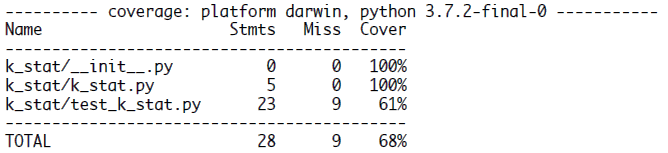

## Линтеры

* Линтинг кода – ваш друг, поддерживает код в хорошем состоянии
(проверка PEP8, детекторы неиспользуемых импортов и некоторых
грубых ошибок)  
* Пример работы:

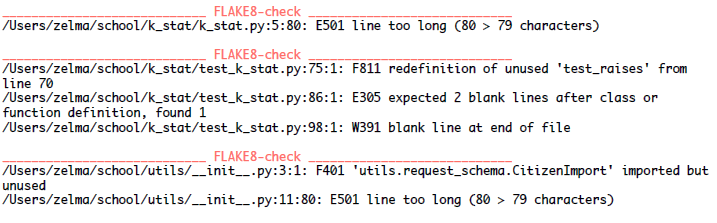

## Пакет `py.test`: резюме

* Пакет `py.test` — швейцарский нож тестирования в мире
Python.
* Плюсы:
    * практически нет API, тесты — обычные функции,
    * удобный вывод,
    * удобный механизм параметризации тестов,
    * приспособления, которые можно переиспользовать,
    * множество встроенных возможностей и впечатляющее
количество расширений.
* Минусы:
    * магия-магия-магия,
    * может быть сложнее для понимания, если вы привыкли к
JUnit.

# Пакет `hypothesis`

## Тестирование свойств

* До текущего момента мы обсуждали тесты, которые
проверяют тривиальные свойства кода:
    * равенство ожидаемому значению,
    * вхождение результата в коллекцию и так далее.
* Иногда можно формулировать и проверять менее
тривиальные свойства, например:
    * если `sorted` возвращает список, отсортированный по
неубыванию,
    * то для любого списка xs и индексов i < j справедливо,
что `sorted(xs)[i] <= sorted(xs)[j]`.
* Вопрос: как проверить это свойство?

## Пример: `test_sort`

In [ ]:
import random
def random_array():
    size = random.randint(0, 1024)
    return [random.randint(-42, 42) for _ in range(size)]
def test_sort():
    xs = random_array()
    result = sorted(xs)
    assert all(xi <= xj
               for xi, xj in zip(result, result[1:]))

* Такой подход сработает, но
    * писать генераторы самостоятельно долго и бессмысленно,
    * на практике нас, как правило, интересует минимальный
контрпример.

## Пакет `hypothesis`

* Пакет `hypothesis` реализует API для формулирования и
проверки свойств.
* Перепишем `test_sort` с использованием `hypothesis`:

In [ ]:
import hypothesis.strategies as st
from hypothesis import given

@given(st.lists(st.integers()))
def test_sort(xs):
    result = sorted(xs)
    assert all(xi <= xj
               for xi, xj in zip(result, result[1:]))

* И попробуем обмануть его:

In [ ]:
def sorted(xs, f=sorted):
    return xs if len(xs) == 8 else f(xs)

## Пакет `hypothesis` и функция `sorted`

```bash
F
========================= FAILURES ======================
________________________ test_sort ______________________
    assert all(xi <= xj
E   assert all(<generator object <genexpr> at 0x103b81e10>)
----------------------- Hypothesis ----------------------
Falsifying example: test_sort(xs=[0, 0, 0, 1, 0, 0, 0])
```




## Пакет `hypothesis`: что можно генерировать?

In [ ]:
# Примитивные типы:
st.just(x)           ==> x, x, x
st.none()            ==> None, None, None
st.one_of(a, b, c)   ==> a, a, b, c, a
st.booleans()        ==> True, False, True
st.integers()        ==> 1, -10, 2, 42
st.floats()          ==> math.pi, 42.42

# Строки и байты:
st.text()           ==> "abra", "cadabra"
st.binary()         ==> b"\xff\xef", b"ascii"

# Коллекции:
st.sampled_from(iterable)
st.tuples(st.foo(), st.bar(), st.boo())
st.lists(st.foo())
st.sets(st.foo())
st.dictionaries(st.foo(), st.bar())

## Пакет `hypothesis` и функция `rle`

In [ ]:
from itertools import chain, repeat, tee

import hypothesis.strategies as st
from hypothesis import given

iterables = st.one_of(st.tuples(st.integers(0, 10)),
                      st.lists(st.integers(0, 10)))

@given(iterables)
def test_rle(it):
    def encode_decode(it):
        return chain.from_iterable(
            repeat(item, count) for item, count in rle(it))
        
    it, copy = tee(it)
    expected = list(copy)
    assert list(encode_decode(it)) == expected

## Пакет `hypothesis`: резюме

* Пакет `hypothesis` позволяет удобно формулировать и
проверять свойства про Python код.
* Мы обсудили, что можно генерировать, и рассмотрели
несколько примеров.

# IDE

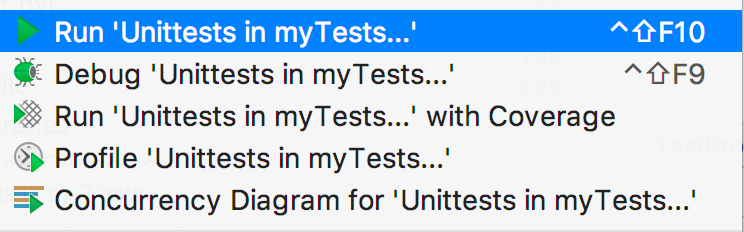

# Mock

## Unittest: зависимости модуля

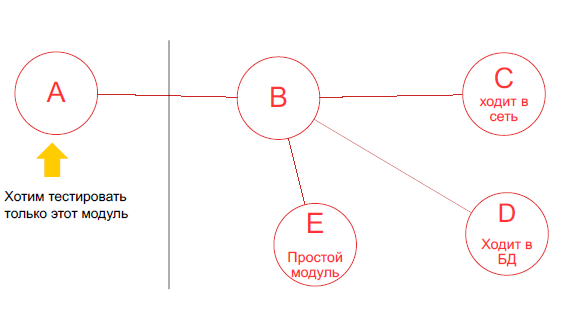

## `unittest.mock`

Иногда необходимо изолировать часть программы для того, чтобы
тестировать только минимально возможную часть системы, для этого
можно использовать специальные объекты, подменяющие внешние
объекты или функции.

`unittest.mock` – это набор универсальных объектов для таких подмен.

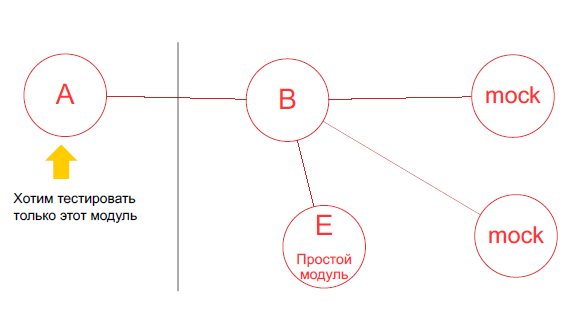

## `unittest.mock.Mock`

Специальный объект, на любой вызов, обращение к методам или
свойствам возвращающий новый объект Mock.

In [20]:
from unittest.mock import Mock
m = Mock()
m()

<Mock name='mock()' id='140255060634128'>

In [21]:
m.f()

<Mock name='mock.f()' id='140255022285776'>

In [22]:
m.is_alive

<Mock name='mock.is_alive' id='140255022148496'>

In [23]:
m.call_count

1

In [24]:
m.f.call_count

1

Mock: примеры

In [ ]:
from unittest.mock import Mock
class AliveChecker:
    def __init__(self, http_session, target):
        self.http_session = http_session
        self.target = target
    def do_check(self):
        try:
            resp = self.http_session.get(
                f'https://{self.target}/ping')
        except Exception:
            return False
        else:
            return resp == 200

In [ ]:
def test_with_mock():
    get_mock = Mock(return_value=200)
    pseudo_client = Mock()
    pseudo_client.get = get_mock
    alive_checker = AliveChecker(pseudo_client,'test.com')
    assert alive_checker.do_check()
    pseudo_client.get.assert_called_once_with(
        'https://test.com/ping')

In [ ]:
def test_with_raising_mock():
    get_mock = Mock(side_effect=Exception('EEEEE'))
    pseudo_client = Mock()
    pseudo_client.get = get_mock
    alive_checker = AliveChecker(
        pseudo_client, 'test.com')
    assert not alive_checker.do_check()
    pseudo_client.get.assert_called_once_with(
        'https://test.com/ping')

## `mock`: патчим библиотеки

In [ ]:
import math
from unittest.mock import patch

def test_patch_sin():
    with patch('math.sin', return_value=2) as m:
        assert math.sin(0) == 2
        assert math.sin(1) == 2
        assert m.call_count == 2

## `Unittest.mock`: не надо так!

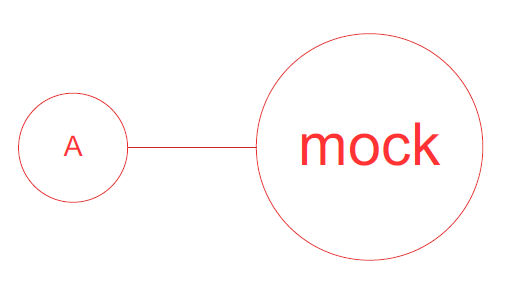